In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib import style
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
style.use('dark_background')

In [2]:
fightdata = pd.read_csv("/home/gary/Documents/springboard/capstone2/fightData/datacopy.csv")
fightdata.columns = map(str.lower, fightdata.columns)

In [3]:
fightdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, r_fighter to r_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


In [4]:
fightdata.head()

,r_fighter,b_fighter,referee,date,location,winner,title_bout,weight_class,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_body_att,b_avg_body_landed,b_avg_clinch_att,b_avg_clinch_landed,b_avg_distance_att,b_avg_distance_landed,b_avg_ground_att,b_avg_ground_landed,b_avg_head_att,b_avg_head_landed,b_avg_kd,b_avg_leg_att,b_avg_leg_landed,b_avg_pass,b_avg_rev,b_avg_sig_str_att,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_att,b_avg_td_landed,b_avg_td_pct,b_avg_total_str_att,b_avg_total_str_landed,b_longest_win_streak,b_losses,b_avg_opp_body_att,b_avg_opp_body_landed,b_avg_opp_clinch_att,b_avg_opp_clinch_landed,b_avg_opp_distance_att,b_avg_opp_distance_landed,b_avg_opp_ground_att,b_avg_opp_ground_landed,b_avg_opp_head_att,b_avg_opp_head_landed,b_avg_opp_kd,b_avg_opp_leg_att,b_avg_opp_leg_landed,b_avg_opp_pass,b_avg_opp_rev,b_avg_opp_sig_str_att,b_avg_opp_sig_str_landed,b_avg_opp_sig_str_pct,b_avg_opp_sub_att,b_avg_opp_td_att,b_avg_opp_td_landed,b_avg_opp_td_pct,b_avg_opp_total_str_att,b_avg_opp_total_str_landed,b_total_rounds_fought,b_total_time_fought(seconds),b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_stance,b_height_cms,b_reach_cms,b_weight_lbs,r_current_lose_streak,r_current_win_streak,r_draw,r_avg_body_att,r_avg_body_landed,r_avg_clinch_att,r_avg_clinch_landed,r_avg_distance_att,r_avg_distance_landed,r_avg_ground_att,r_avg_ground_landed,r_avg_head_att,r_avg_head_landed,r_avg_kd,r_avg_leg_att,r_avg_leg_landed,r_avg_pass,r_avg_rev,r_avg_sig_str_att,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_att,r_avg_td_landed,r_avg_td_pct,r_avg_total_str_att,r_avg_total_str_landed,r_longest_win_streak,r_losses,r_avg_opp_body_att,r_avg_opp_body_landed,r_avg_opp_clinch_att,r_avg_opp_clinch_landed,r_avg_opp_distance_att,r_avg_opp_distance_landed,r_avg_opp_ground_att,r_avg_opp_ground_landed,r_avg_opp_head_att,r_avg_opp_head_landed,r_avg_opp_kd,r_avg_opp_leg_att,r_avg_opp_leg_landed,r_avg_opp_pass,r_avg_opp_rev,r_avg_opp_sig_str_att,r_avg_opp_sig_str_landed,r_avg_opp_sig_str_pct,r_avg_opp_sub_att,r_avg_opp_td_att,r_avg_opp_td_landed,r_avg_opp_td_pct,r_avg_opp_total_str_att,r_avg_opp_total_str_landed,r_total_rounds_fought,r_total_time_fought(seconds),r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [5]:
check = fightdata['b_avg_body_att'] - fightdata['r_avg_opp_body_att']
print(check.describe())

count    3648.000000
mean        0.598782
std         8.242246
min       -69.900000
25%        -4.000000
50%         0.065801
75%         4.716346
max        39.500000
dtype: float64


In [6]:
fightdata['r_height_adv'] = fightdata['r_height_cms'] - fightdata['b_height_cms']
fightdata['b_height_adv'] = fightdata['b_height_cms'] - fightdata['r_height_cms']
fightdata['r_reach_adv'] = fightdata['r_reach_cms'] - fightdata['b_reach_cms']
fightdata['b_reach_adv'] = fightdata['b_reach_cms'] - fightdata['r_reach_cms']
fightdata['r_older_than'] = fightdata['r_age'] - fightdata['b_age']
fightdata['b_older_than'] = fightdata['b_age'] - fightdata['r_age']
fightdata.head()

,r_fighter,b_fighter,referee,date,location,winner,title_bout,weight_class,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_body_att,b_avg_body_landed,b_avg_clinch_att,b_avg_clinch_landed,b_avg_distance_att,b_avg_distance_landed,b_avg_ground_att,b_avg_ground_landed,b_avg_head_att,b_avg_head_landed,b_avg_kd,b_avg_leg_att,b_avg_leg_landed,b_avg_pass,b_avg_rev,b_avg_sig_str_att,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_att,b_avg_td_landed,b_avg_td_pct,b_avg_total_str_att,b_avg_total_str_landed,b_longest_win_streak,b_losses,b_avg_opp_body_att,b_avg_opp_body_landed,b_avg_opp_clinch_att,b_avg_opp_clinch_landed,b_avg_opp_distance_att,b_avg_opp_distance_landed,b_avg_opp_ground_att,b_avg_opp_ground_landed,b_avg_opp_head_att,b_avg_opp_head_landed,b_avg_opp_kd,b_avg_opp_leg_att,b_avg_opp_leg_landed,b_avg_opp_pass,b_avg_opp_rev,b_avg_opp_sig_str_att,b_avg_opp_sig_str_landed,b_avg_opp_sig_str_pct,b_avg_opp_sub_att,b_avg_opp_td_att,b_avg_opp_td_landed,b_avg_opp_td_pct,b_avg_opp_total_str_att,b_avg_opp_total_str_landed,b_total_rounds_fought,b_total_time_fought(seconds),b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_stance,b_height_cms,b_reach_cms,...,r_current_lose_streak,r_current_win_streak,r_draw,r_avg_body_att,r_avg_body_landed,r_avg_clinch_att,r_avg_clinch_landed,r_avg_distance_att,r_avg_distance_landed,r_avg_ground_att,r_avg_ground_landed,r_avg_head_att,r_avg_head_landed,r_avg_kd,r_avg_leg_att,r_avg_leg_landed,r_avg_pass,r_avg_rev,r_avg_sig_str_att,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_att,r_avg_td_landed,r_avg_td_pct,r_avg_total_str_att,r_avg_total_str_landed,r_longest_win_streak,r_losses,r_avg_opp_body_att,r_avg_opp_body_landed,r_avg_opp_clinch_att,r_avg_opp_clinch_landed,r_avg_opp_distance_att,r_avg_opp_distance_landed,r_avg_opp_ground_att,r_avg_opp_ground_landed,r_avg_opp_head_att,r_avg_opp_head_landed,r_avg_opp_kd,r_avg_opp_leg_att,r_avg_opp_leg_landed,r_avg_opp_pass,r_avg_opp_rev,r_avg_opp_sig_str_att,r_avg_opp_sig_str_landed,r_avg_opp_sig_str_pct,r_avg_opp_sub_att,r_avg_opp_td_att,r_avg_opp_td_landed,r_avg_opp_td_pct,r_avg_opp_total_str_att,r_avg_opp_total_str_landed,r_total_rounds_fought,r_total_time_fought(seconds),r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age,r_height_adv,b_height_adv,r_reach_adv,b_reach_adv,r_older_than,b_older_than
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,...,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0,-5.08,5.08,-7.62,7.62,1.0,-1.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9

In [7]:
missing = pd.concat([fightdata.isnull().sum(), 100 * fightdata.isnull().mean()], axis=1)
missing.columns=['count', 'percent']
missing.sort_values(by='count')
np.transpose(missing)

fightswithnul = fightdata[fightdata.isnull().any(axis=1)]
fightswithnul[:100] 

#matches with missing data seem to come from untelevised matches

,r_fighter,b_fighter,referee,date,location,winner,title_bout,weight_class,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_body_att,b_avg_body_landed,b_avg_clinch_att,b_avg_clinch_landed,b_avg_distance_att,b_avg_distance_landed,b_avg_ground_att,b_avg_ground_landed,b_avg_head_att,b_avg_head_landed,b_avg_kd,b_avg_leg_att,b_avg_leg_landed,b_avg_pass,b_avg_rev,b_avg_sig_str_att,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_att,b_avg_td_landed,b_avg_td_pct,b_avg_total_str_att,b_avg_total_str_landed,b_longest_win_streak,b_losses,b_avg_opp_body_att,b_avg_opp_body_landed,b_avg_opp_clinch_att,b_avg_opp_clinch_landed,b_avg_opp_distance_att,b_avg_opp_distance_landed,b_avg_opp_ground_att,b_avg_opp_ground_landed,b_avg_opp_head_att,b_avg_opp_head_landed,b_avg_opp_kd,b_avg_opp_leg_att,b_avg_opp_leg_landed,b_avg_opp_pass,b_avg_opp_rev,b_avg_opp_sig_str_att,b_avg_opp_sig_str_landed,b_avg_opp_sig_str_pct,b_avg_opp_sub_att,b_avg_opp_td_att,b_avg_opp_td_landed,b_avg_opp_td_pct,b_avg_opp_total_str_att,b_avg_opp_total_str_landed,b_total_rounds_fought,b_total_time_fought(seconds),b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_stance,b_height_cms,b_reach_cms,...,r_current_lose_streak,r_current_win_streak,r_draw,r_avg_body_att,r_avg_body_landed,r_avg_clinch_att,r_avg_clinch_landed,r_avg_distance_att,r_avg_distance_landed,r_avg_ground_att,r_avg_ground_landed,r_avg_head_att,r_avg_head_landed,r_avg_kd,r_avg_leg_att,r_avg_leg_landed,r_avg_pass,r_avg_rev,r_avg_sig_str_att,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_att,r_avg_td_landed,r_avg_td_pct,r_avg_total_str_att,r_avg_total_str_landed,r_longest_win_streak,r_losses,r_avg_opp_body_att,r_avg_opp_body_landed,r_avg_opp_clinch_att,r_avg_opp_clinch_landed,r_avg_opp_distance_att,r_avg_opp_distance_landed,r_avg_opp_ground_att,r_avg_opp_ground_landed,r_avg_opp_head_att,r_avg_opp_head_landed,r_avg_opp_kd,r_avg_opp_leg_att,r_avg_opp_leg_landed,r_avg_opp_pass,r_avg_opp_rev,r_avg_opp_sig_str_att,r_avg_opp_sig_str_landed,r_avg_opp_sig_str_pct,r_avg_opp_sub_att,r_avg_opp_td_att,r_avg_opp_td_landed,r_avg_opp_td_pct,r_avg_opp_total_str_att,r_avg_opp_total_str_landed,r_total_rounds_fought,r_total_time_fought(seconds),r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age,r_height_adv,b_height_adv,r_reach_adv,b_reach_adv,r_older_than,b_older_than
5,Tatiana Suarez,Nina Ansaroff,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0.0,4.0,0.0,19.500000,12.333333,11.833333,7.166667,142.333333,63.833333,6.000000,4.166667,117.833333,42.666667,0.00,22.833333,20.166667,1.333333,0.166667,160.166667,75.166667,0.470000,0.666667,0.833333,0.333333,0.250000,183.500000,95.666667,4.0,2.0,12.000000,7.333333,9.666667,7.000000,95.166667,38.333333,5.166667,3.500000,86.666667,33.166667,0.000000,11.333333,8.333333,1.500000,0.166667,110.000000,48.833333,0.426667,0.000000,6.000000,1.166667,0.140000,131.500000,68.666667,18.0,886.500000,0.0,0.0,0.0,3.0,0.0,1.0,0.0,4.0,Orthodox,165.10,162.56,...,0.0,4.0,0.0,8.750000,7.500000,3.000000,2.250000,12.750000,4.750000,42.250000,35.750000,44.750000,31.250000,0.000000,4.500000,4.000000,7.750000,0.000000,58.000000,42.750000,0.637500,0.500000,5.500000,4.500000,0.817500,101.500000,80.500000,4.0,0.0,3.000000,2.250000,3.500000,3.000000,5.750000,2.000000,2.000000,1.500000,8.000000,4.000000,0.000000,0.250000,0.250000,0.000000,0.500000,11.250000,6.500000,0.540000,0.750000,0.500000,0.000000,0.000000,38.000000,26.500000,8.0,540.000000,1.0,0.0,0.0,1.0,1.0,2.0,0.0,4.0,NaN,165.10,167.64,115.0,33.0,28.0,0.00,0.00,5.08,-5.08,-5.0,5.0
11,Eddie Wineland,Grigorii Popov,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Red,False,Bantamweight,3

In [112]:
fd = fightdata.drop(['r_fighter', 'b_fighter', 'referee', 'date', 'location', 'b_draw', 'r_draw'], axis = 1)
fd = fd.dropna()
fd = fd[fd.columns.drop(list(fd.filter(regex='win_by')))]
fd = fd[fd['winner'] != 'Draw']
fd = fd.reset_index()
fd.describe()

,index,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_avg_body_att,b_avg_body_landed,b_avg_clinch_att,b_avg_clinch_landed,b_avg_distance_att,b_avg_distance_landed,...,r_reach_cms,r_weight_lbs,b_age,r_age,r_height_adv,b_height_adv,r_reach_adv,b_reach_adv,r_older_than,b_older_than
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,...,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,2276.274968,3.234197,0.551833,1.171934,9.166571,6.416604,8.570319,5.820881,56.291948,20.616294,...,183.987838,170.665929,29.719343,30.076802,-0.157345,0.157345,0.101953,-0.101953,0.357459,-0.357459
std,1340.725221,0.644405,0.799640,1.415606,7.033922,5.029892,7.483181,5.431700,40.365395,15.880587,...,10.351930,33.214618,4.019742,4.134948,6.370702,6.370702,8.317856,8.317856,5.208298,5.208298
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,152.400000,115.000000,20.000000,19.000000,-30.480000,-33.020000,-30.480000,-30.480000,-17.000000,-17.000000
25%,1120.500000,3.000000,0.000000,0.000000,4.000000,2.875000,3.500000,2.121528,26.500000,9.166667,...,177.800000,145.000000,27.000000,27.000000,-5.080000,-5.080000,-5.080000,-5.080000,-3.000000,-4.000000
50%,2216.500000,3.000000,0.000000,1.000000,7.500000,5.166667,6.750000,4.522727,48.000000,16.666667,...,185.420000,170.000000,29.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3413.500000,3.000000,1.000000,2.000000,12.500000,8.750000,11.817708,8.000000,76.500000,28.500000,...,190.500000,185.000000,32.000000,33.000000,5.080000,5.080000,5.080000,5.080000,4.000000,3.000000
max,5008.000000,5.000000,6.000000,12.000000,49.000000,39.000000,87.000000,68.000000,271.000000,130.000000,...,213.360000,265.000000,47.000000,46.000000,33.020000,30.480000,30.480000,30.480000,17.000000,17.000000


In [113]:
fd['winner'].unique()

array(['Red', 'Blue'], dtype=object)

In [114]:
fd.columns.values

array(['index', 'winner', 'title_bout', 'weight_class', 'no_of_rounds',
       'b_current_lose_streak', 'b_current_win_streak', 'b_avg_body_att',
       'b_avg_body_landed', 'b_avg_clinch_att', 'b_avg_clinch_landed',
       'b_avg_distance_att', 'b_avg_distance_landed', 'b_avg_ground_att',
       'b_avg_ground_landed', 'b_avg_head_att', 'b_avg_head_landed',
       'b_avg_kd', 'b_avg_leg_att', 'b_avg_leg_landed', 'b_avg_pass',
       'b_avg_rev', 'b_avg_sig_str_att', 'b_avg_sig_str_landed',
       'b_avg_sig_str_pct', 'b_avg_sub_att', 'b_avg_td_att',
       'b_avg_td_landed', 'b_avg_td_pct', 'b_avg_total_str_att',
       'b_avg_total_str_landed', 'b_longest_win_streak', 'b_losses',
       'b_avg_opp_body_att', 'b_avg_opp_body_landed',
       'b_avg_opp_clinch_att', 'b_avg_opp_clinch_landed',
       'b_avg_opp_distance_att', 'b_avg_opp_distance_landed',
       'b_avg_opp_ground_att', 'b_avg_opp_ground_landed',
       'b_avg_opp_head_att', 'b_avg_opp_head_landed', 'b_avg_opp_kd',
       '

In [115]:
#i might take the difference of actions performed and perform analysis on the differences, might also calculate accuracy of actions
fddiffs = pd.DataFrame()
fddiffs[['winner', 'diff_age', 'diff_height', 'diff_reach']] = fd[['winner', 'b_older_than', 'b_height_adv', 'b_reach_adv']]


#24 diff actions

start = fd.columns.get_loc('b_avg_body_att')
end = fd.columns.get_loc('b_avg_total_str_landed') + 1
posdiff = fd.columns.get_loc('r_avg_body_att') - fd.columns.get_loc('b_avg_body_att')
posdiff

for i in range(start, end):
    fddiffs[fd.columns[i].replace('b_', 'diff_', 1)] = fd[fd.columns[i]] - fd[fd.columns[i + posdiff]]

fddiffs.head()
fddiffs.describe()

,diff_age,diff_height,diff_reach,diff_avg_body_att,diff_avg_body_landed,diff_avg_clinch_att,diff_avg_clinch_landed,diff_avg_distance_att,diff_avg_distance_landed,diff_avg_ground_att,...,diff_avg_rev,diff_avg_sig_str_att,diff_avg_sig_str_landed,diff_avg_sig_str_pct,diff_avg_sub_att,diff_avg_td_att,diff_avg_td_landed,diff_avg_td_pct,diff_avg_total_str_att,diff_avg_total_str_landed
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,...,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,-0.357459,0.157345,-0.101953,-0.063008,0.024926,0.273601,0.208942,-0.348014,-0.092198,-0.817489,...,0.016037,-0.891902,-0.422764,-0.005830,-0.001232,-0.155275,-0.092131,-0.016674,-0.444116,-0.033058
std,5.208298,6.370702,8.317856,8.968537,6.542465,9.903540,7.228115,49.348254,18.968733,11.285326,...,0.394007,52.652592,22.379292,0.153723,0.856187,3.515866,1.616964,0.316856,60.955163,35.123323
min,-17.000000,-33.020000,-30.480000,-50.000000,-33.500000,-57.900000,-46.500000,-219.666667,-102.333333,-78.000000,...,-3.000000,-221.666667,-104.666667,-0.800000,-8.666667,-19.500000,-10.333333,-1.000000,-211.666667,-140.000000
25%,-4.000000,-5.080000,-5.080000,-4.966270,-3.612013,-5.000000,-3.500000,-28.500000,-10.754464,-6.600000,...,-0.113949,-33.187500,-14.254167,-0.091446,-0.416667,-2.146032,-1.000000,-0.221942,-39.770833,-22.000000
50%,0.000000,0.000000,0.000000,-0.166667,-0.100000,0.000000,0.000000,-1.000000,-0.602381,-0.774603,...,0.000000,-2.244231,-1.476705,-0.002111,0.000000,-0.102632,0.000000,-0.002024,-1.208929,-0.738636
75%,3.000000,5.080000,5.080000,4.666667,3.387338,5.166667,3.634314,26.035417,9.637847,4.787500,...,0.138889,29.677083,12.639493,0.089412,0.375677,1.762500,0.777778,0.171517,37.554762,22.000000
max,17.000000,30.480000,30.480000,43.500000,34.166667,77.000000,61.000000,246.000000,112.333333,81.125000,...,3.000000,270.000000,128.222222,0.570000,6.500000,17.333333,10.000000,1.000000,282.500000,178.666667


In [116]:
fdresp = fddiffs['winner']
fdpred = fddiffs.drop(['winner'], axis = 1)

fddiffs.corr()

,diff_age,diff_height,diff_reach,diff_avg_body_att,diff_avg_body_landed,diff_avg_clinch_att,diff_avg_clinch_landed,diff_avg_distance_att,diff_avg_distance_landed,diff_avg_ground_att,...,diff_avg_rev,diff_avg_sig_str_att,diff_avg_sig_str_landed,diff_avg_sig_str_pct,diff_avg_sub_att,diff_avg_td_att,diff_avg_td_landed,diff_avg_td_pct,diff_avg_total_str_att,diff_avg_total_str_landed
diff_age,1.000000,-0.195067,-0.199200,-0.039183,-0.034304,-0.021794,-0.003971,-0.064348,-0.071518,-0.096206,...,-0.025025,-0.085029,-0.090517,0.004821,-0.054024,0.012269,-0.067896,-0.060659,-0.064746,-0.037504
diff_height,-0.195067,1.000000,0.662325,0.024315,0.021320,-0.012834,0.000079,-0.001872,0.011084,0.008524,...,0.057376,-0.002341,0.014854,0.044029,0.082730,-0.159714,-0.124167,-0.055700,-0.020891,-0.019907
diff_reach,-0.199200,0.662325,1.000000,0.033927,0.027664,-0.039108,-0.018523,-0.013912,-0.020042,0.020364,...,0.080800,-0.016030,-0.017299,0.012480,0.111018,-0.110399,-0.056504,0.004570,-0.028805,-0.032681
diff_avg_body_att,-0.039183,0.024315,0.033927,1.000000,0.954824,0.530652,0.526725,0.578159,0.610277,0.066119,...,-0.004805,0.655859,0.712694,0.086556,-0.138188,0.016027,-0.010443,-0.036746,0.616735,0.537693
diff_avg_body_landed,-0.034304,0.021320,0.027664,0.954824,1.000000,0.590963,0.609996,0.484438,0.550598,0.118991,...,0.002932,0.590695,0.710444,0.193113,-0.108977,0.026440,0.023204,0.009971,0.581512,0.570563
diff_avg_clinch_att,-0.021794,-0.012834,-0.039108,0.530652,0.590963,1.000000,0.969847,0.226294,0.244967,0.105424,...,-0.002091,0.422781,0.556934,0.175263,-0.102710,0.125769,0.102198,0.019211,0.472577,0.528472
diff_avg_clinch_landed,-0.003971,0.000079,-0.018523,0.526725,0.609996,0.969847,1.000000,0.168642,0.205206,0.103096,...,-0.003560,0.362576,0.535223,0.252712,-0.094157,0.112582,0.096057,0.025409,0.422666,0.518973
diff_avg_distance_att,-0.064348,-0.001872,-0.013912,0.578159,0.484438,0.226294,0.168642,1.000000,0.925730,-0.119542,...,-0.082940,0.954185,0.792249,-0.308317,-0.188703,-0.021617,-0.095363,-0.120611,0.806832,0.479020
diff_avg_distance_landed,-0.071518,0.011084,-0.020042,0.610277,0.550598,0.244967,0.205206,0.925730,1.000000,-0.124641,...,-0.072206,0.886995,0.868535,-0.097120,-0.178884,-0.065499,-0.114858,-0.114185,0.744264,0.521640
diff_avg_ground_att,-0.096206,0.008524,0.020364,0.066119,0.118991,0.105424,0.103096,-0.119542,-0.124641,1.000000,...,0.137317,0.122125,0.258983,0.229322,0.053279,0.295719,0.422559,0.361178,0.294262,0.450520


<AxesSubplot:>

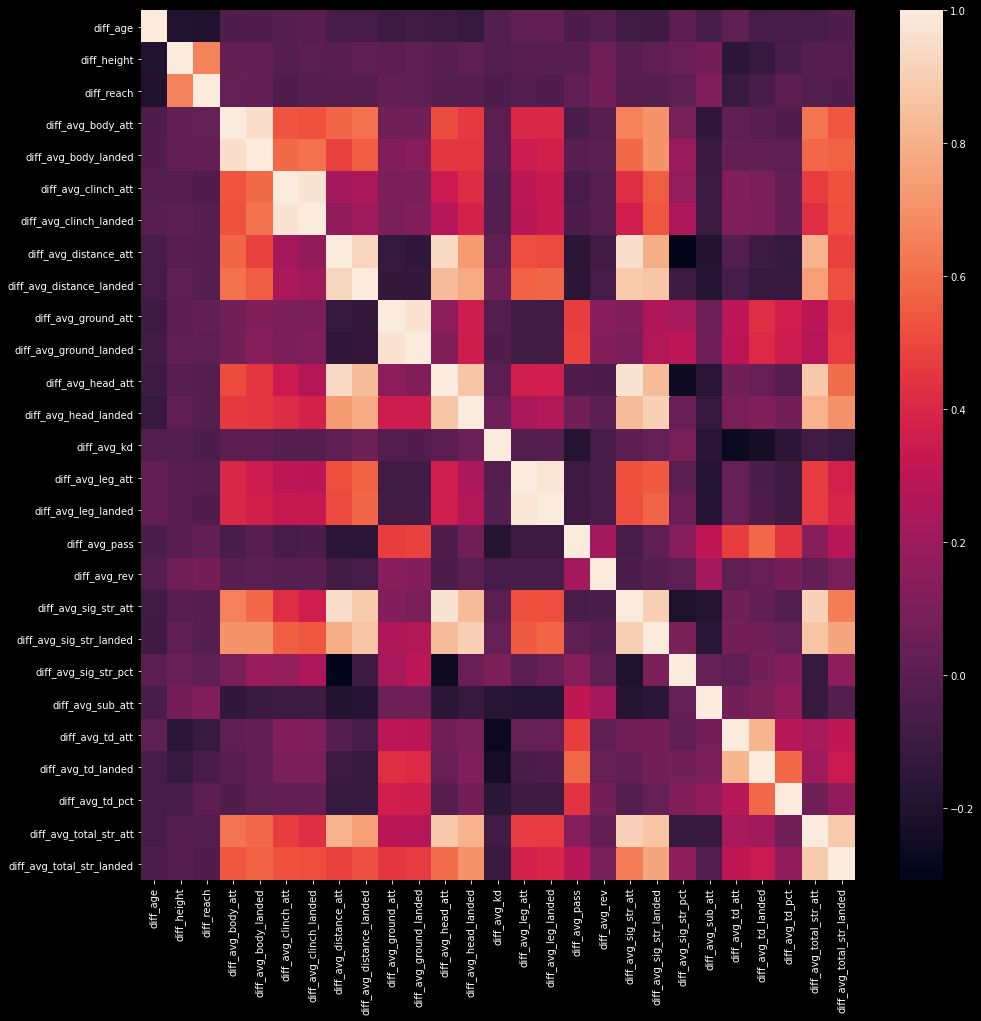

In [117]:
fig, ax = plt.subplots(figsize=(16,16))

sns.heatmap(fddiffs.corr())

In [120]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'winner', data=fddiffs, alpha=0.5)
        ax.set(xlabel=col, ylabel='Winner B or R')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [ii for ii in fddiffs.columns if ii not in ['winner']]
features

['diff_age',
 'diff_height',
 'diff_reach',
 'diff_avg_body_att',
 'diff_avg_body_landed',
 'diff_avg_clinch_att',
 'diff_avg_clinch_landed',
 'diff_avg_distance_att',
 'diff_avg_distance_landed',
 'diff_avg_ground_att',
 'diff_avg_ground_landed',
 'diff_avg_head_att',
 'diff_avg_head_landed',
 'diff_avg_kd',
 'diff_avg_leg_att',
 'diff_avg_leg_landed',
 'diff_avg_pass',
 'diff_avg_rev',
 'diff_avg_sig_str_att',
 'diff_avg_sig_str_landed',
 'diff_avg_sig_str_pct',
 'diff_avg_sub_att',
 'diff_avg_td_att',
 'diff_avg_td_landed',
 'diff_avg_td_pct',
 'diff_avg_total_str_att',
 'diff_avg_total_str_landed']

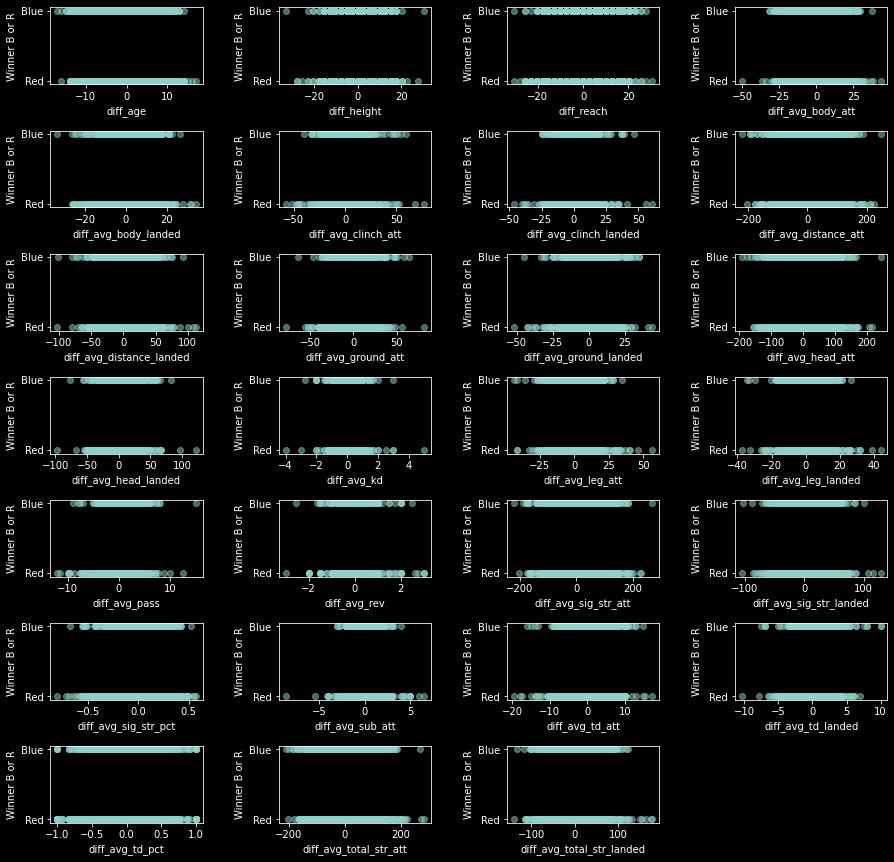

In [121]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [ ]:
#how do i add regression lines?